<a href="https://colab.research.google.com/github/stenoe/BDOA/blob/main/Notebooks/Code_Lecture_5_MODIS_Evapotranspiration_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Evapotranspiration Data from MODIS (TERRA satellite)

(Version 2024)

MODIS is a sensor in TERRA satellite, MODIS means Moderate-Resolution Imaging Spectroradiometer.
We have downloaded the data from the Appeears platform:
https://appeears.earthdatacloud.nasa.gov/

* Data comes from 3 different regions of the world:
  * Ahja river basin, located near Tartu in Estonia (Hemi-Boreal Forest)
  * Nhundiaquara river basin, located at the Paraná state in the south of Brazil (Atlantic Rain Forest)
  * Hari river basin (Afghan-India Friendship Dam (AIFD), formerly Salma Dam) in Herat Province of western Afghanistan (Dry climate vegetation)
* Convert the data from (mm/8day) to (mm/day)
* Resample data to monthly or yearly time steps
* Visualize and compare data from different regions

In [1]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

%matplotlib inline

# Import the 3 CSV Files from GitHub to Colab folder manually

Link for the files: https://github.com/stenoe/BDOA

Go to folder "Evapotranspiration Data", and download:

* Ahja-MOD16A2GF-006-Statistics.csv
* Nhundiaquara-MOD16A2GF-006-Statistics.csv
* Salma-MOD16A2GF-006-Statistics.csv

Now, open in Colab (left menu area) the folder symbol:

* right click and choose 'new folder' from the menu
* name the new folder 'data'
* enter to the new folder
* upload the data files


# Import the 3 CSV Files from GitHub to Colab folder programatically

We can use a machine-2-machine reading pattern to download the files using the Python language and the `pathlib` and `requests` libraries.

We need to:

* Create a path to a new folder with the name 'data'
* If that already exists, we do not create it again
* Create a file descriptor `f` for each of our files
* Use the Github REST API get command to load the file content. (CAUTION: We need to use the https link to the **raw** file)
* write the file contents to the folder


In [2]:
# import the needed libraries
import requests
from pathlib import Path

# set a path to store data, we use the current directory
data_path = Path("data/")

# check if there is a data directory, if not create one
if data_path.is_dir():
  print(f"Directory {data_path} already exists... skipping creation")
else:
  print(f"Directory {data_path} created")
  data_path.mkdir(parents=True, exist_ok=True)

# download data file from github REST-API (use raw link!)
with open(data_path / "Ahja-MOD16A2GF-006-Statistics.csv", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/stenoe/BDOA/main/Evapotranspiration%20data/Ahja-MOD16A2GF-006-Statistics.csv")
  print("Downloading Ahjs data...")
  f.write(request.content)

# Download Nhundiaquara data
with open(data_path / "Nhundiaquara-MOD16A2GF-006-Statistics.csv", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/stenoe/BDOA/main/Evapotranspiration%20data/Nhundiaquara-MOD16A2GF-006-Statistics.csv")
  print("Downloading Nhundiaquara MODIS data...")
  f.write(request.content)

# Download Salma data
with open(data_path / "Salma-MOD16A2GF-006-Statistics.csv", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/stenoe/BDOA/main/Evapotranspiration%20data/Salma-MOD16A2GF-006-Statistics.csv")
  print("Downloading Salma MODIS data...")
  f.write(request.content)


Directory data created


Optionally, you can check for each download some parameters if the download was successful, or the type of the data.

In [3]:
## Check for some REST API informations
print(f"Content-type: {request.headers['content-type']}")
print(f"Encoding    : {request.encoding}")
print(f"Status code : {request.status_code} (200=OK, 400=BAD REQUEST)")


Content-type: text/plain; charset=utf-8
Encoding    : utf-8
Status code : 200 (200=OK, 400=BAD REQUEST)


## Lambda Function

* A lambda function is a small anonymous function.

* A lambda function can take any number of arguments, but can only have one expression.

```python
lambda arguments : expression
```

In [4]:
# This anonymous function to add 10 to the argument and return it
x = lambda a : a + 10
print(x(5))

15


In [5]:
# Multiply argument a with argument b and return the result:
x = lambda a, b : a * b
print(x(5, 6))

30


In [6]:
# A non anonymous function would be like this:
def function_add10(a):
  return a + 10

function_add10(5)

15

## MODIS data (8 days accumulated)

Importing the 3 files into 3 DataFrames:

In [7]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
Ahja_ET_PET = pd.read_csv(data_path / 'Ahja-MOD16A2GF-006-Statistics.csv',sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
Ahja_ET_PET.index=pd.to_datetime(Ahja_ET_PET.index)

Nhundiaquara_ET_PET = pd.read_csv(data_path / 'Nhundiaquara-MOD16A2GF-006-Statistics.csv',sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
Nhundiaquara_ET_PET.index=pd.to_datetime(Nhundiaquara_ET_PET.index)

Salma_ET_PET = pd.read_csv(data_path / 'Salma-MOD16A2GF-006-Statistics.csv',sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
Salma_ET_PET.index=pd.to_datetime(Salma_ET_PET.index)

Nhundiaquara_ET_PET.tail(3)

<ipython-input-7-a31097d40b7a>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Ahja_ET_PET = pd.read_csv(data_path / 'Ahja-MOD16A2GF-006-Statistics.csv',sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
<ipython-input-7-a31097d40b7a>:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Nhundiaquara_ET_PET = pd.read_csv(data_path / 'Nhundiaquara-MOD16A2GF-006-Statistics.csv',sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
<ipython-input-7-a31097d40b7a>:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_dateti

,File Name,Dataset,aid,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,
2021-12-11,MOD16A2GF_006_PET_500m_doy2021345_aid0001,PET_500m,aid0001,1792.0,43.8,75.2,"(43.8,75.2)",64.290737,5.247231,27.533430,68.3,75.2,67.2,46.8,58.525
2021-12-19,MOD16A2GF_006_PET_500m_doy2021353_aid0001,PET_500m,aid0001,1792.0,62.7,76.8,"(62.7,76.8)",71.516908,1.483649,2.201215,72.4,74.1,71.7,69.4,71.200
2021-12-27,MOD16A2GF_006_PET_500m_doy2021361_aid0001,PET_500m,aid0001,1792.0,30.7,40.0,"(30.7,40.0)",35.064174,1.038151,1.077757,35.6,36.3,35.3,33.9,34.900


In [8]:
print(len(Ahja_ET_PET),len(Nhundiaquara_ET_PET),len(Salma_ET_PET))

2024 2024 1932


## Create new DataFrames

Activities:

1. Print the Dataframe
2. Recognize that the column "Dataset" splits the data into ET and PET
3. Create 2 Dataframes containing data from 3 watersheds (one for ET and another for PET)

In [9]:
Ahja_ET_PET

,File Name,Dataset,aid,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,
2000-01-01,MOD16A2GF_006_ET_500m_doy2000001_aid0001,ET_500m,aid0001,8382.0,-0.4,1.5,"(-0.4,1.5)",1.138762,0.294772,0.086890,1.4,1.5,1.2,0.4,1.0
2000-01-09,MOD16A2GF_006_ET_500m_doy2000009_aid0001,ET_500m,aid0001,8382.0,-0.3,1.6,"(-0.3,1.6)",1.287008,0.298184,0.088914,1.5,1.6,1.4,0.8,1.2
2000-01-17,MOD16A2GF_006_ET_500m_doy2000017_aid0001,ET_500m,aid0001,8382.0,-0.2,2.1,"(-0.2,2.1)",1.640933,0.360377,0.129872,1.9,2.1,1.7,0.9,1.5
2000-01-25,MOD16A2GF_006_ET_500m_doy2000025_aid0001,ET_500m,aid0001,8382.0,-0.2,2.0,"(-0.2,2.0)",1.583274,0.351500,0.123552,1.8,2.0,1.7,0.8,1.4
2000-02-02,MOD16A2GF_006_ET_500m_doy2000033_aid0001,ET_500m,aid0001,8382.0,0.1,1.5,"(0.1,1.5)",1.279886,0.170529,0.029080,1.4,1.5,1.3,0.9,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,MOD16A2GF_006_PET_500m_doy2021329_aid0001,PET_500m,aid0001,8386.0,0.6,2.6,"(0.6,2.6)",1.751359,0.222084,0.049321,1.9,2.2,1.8,1.4,1.7
2021-12-03,MOD16A2GF_006_PET_500m_doy2021337_aid0001,PET_500m,aid0001,8386.0,0.7,1.8,"(0.7,1.8)",1.595194,0.200398,0.040159,1.7,1.8,1.7,1.5,1.6
2021-12-11,MOD16A2GF_006_PET_500m_doy2021345_aid0001,PET_500m,aid0001,8386.0,0.5,2.0,"(0.5,2.0)",1.218829,0.158041,0.024977,1.3,1.4,1.3,1.1,1.2


In [10]:
# Only ET data
Ahja_ET_PET.query("Dataset == 'ET_500m'")

,File Name,Dataset,aid,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,
2000-01-01,MOD16A2GF_006_ET_500m_doy2000001_aid0001,ET_500m,aid0001,8382.0,-0.4,1.5,"(-0.4,1.5)",1.138762,0.294772,0.086890,1.4,1.5,1.2,0.4,1.0
2000-01-09,MOD16A2GF_006_ET_500m_doy2000009_aid0001,ET_500m,aid0001,8382.0,-0.3,1.6,"(-0.3,1.6)",1.287008,0.298184,0.088914,1.5,1.6,1.4,0.8,1.2
2000-01-17,MOD16A2GF_006_ET_500m_doy2000017_aid0001,ET_500m,aid0001,8382.0,-0.2,2.1,"(-0.2,2.1)",1.640933,0.360377,0.129872,1.9,2.1,1.7,0.9,1.5
2000-01-25,MOD16A2GF_006_ET_500m_doy2000025_aid0001,ET_500m,aid0001,8382.0,-0.2,2.0,"(-0.2,2.0)",1.583274,0.351500,0.123552,1.8,2.0,1.7,0.8,1.4
2000-02-02,MOD16A2GF_006_ET_500m_doy2000033_aid0001,ET_500m,aid0001,8382.0,0.1,1.5,"(0.1,1.5)",1.279886,0.170529,0.029080,1.4,1.5,1.3,0.9,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,MOD16A2GF_006_ET_500m_doy2021329_aid0001,ET_500m,aid0001,8386.0,0.9,2.7,"(0.9,2.7)",1.786442,0.183757,0.033767,1.9,2.0,1.8,1.7,1.8
2021-12-03,MOD16A2GF_006_ET_500m_doy2021337_aid0001,ET_500m,aid0001,8386.0,0.8,1.8,"(0.8,1.8)",1.600906,0.183259,0.033584,1.7,1.8,1.7,1.5,1.6
2021-12-11,MOD16A2GF_006_ET_500m_doy2021345_aid0001,ET_500m,aid0001,8386.0,0.6,2.1,"(0.6,2.1)",1.236776,0.134222,0.018016,1.3,1.4,1.3,1.1,1.2


In [11]:
# Create empty DataFrames
modis_ET  = pd.DataFrame()
modis_PET = pd.DataFrame()

# Separates what is evapotranspiration from potential evapotranspiration

# Pick only the column "Mean"
modis_ET['Hari ET (mm/8day)'] = Salma_ET_PET.query("Dataset == 'ET_500m'")['Mean']
modis_ET['Nhundiaquara ET (mm/8day)'] = Nhundiaquara_ET_PET.query("Dataset == 'ET_500m'")['Mean']
modis_ET['Ahja ET (mm/8day)'] = Ahja_ET_PET.query("Dataset == 'ET_500m'")['Mean']

modis_PET['Hari PET (mm/8day)'] = Salma_ET_PET.query("Dataset == 'PET_500m'")['Mean']
modis_PET['Nhundiaquara PET (mm/8day)'] = Nhundiaquara_ET_PET.query("Dataset == 'PET_500m'")['Mean']
modis_PET['Ahja PET (mm/8day)'] = Ahja_ET_PET.query("Dataset == 'PET_500m'")['Mean']

In [12]:
modis_ET

,Hari ET (mm/8day),Nhundiaquara ET (mm/8day),Ahja ET (mm/8day)
Date,,,
2000-01-01,3.527832,25.474777,1.138762
2000-01-09,6.268466,26.378906,1.287008
2000-01-17,6.290238,29.151897,1.640933
2000-01-25,7.560660,26.918471,1.583274
2000-02-02,6.763781,28.636105,1.279886
...,...,...,...
2020-11-24,7.500534,44.748605,0.798188
2020-12-02,6.491082,35.372377,1.118447
2020-12-10,6.402873,38.752734,1.172013


In [13]:
modis_PET

,Hari PET (mm/8day),Nhundiaquara PET (mm/8day),Ahja PET (mm/8day)
Date,,,
2000-01-01,26.503321,33.071931,1.069709
2000-01-09,10.831318,33.600056,1.230220
2000-01-17,8.601710,39.508650,1.557540
2000-01-25,15.225252,36.349386,1.495574
2000-02-02,13.947754,39.068694,1.286388
...,...,...,...
2020-11-24,16.185225,61.567801,0.567207
2020-12-02,10.413327,46.384431,0.377856
2020-12-10,9.999829,52.096987,0.874589


In [14]:
len(modis_ET), len(modis_PET)

(966, 966)

<Axes: xlabel='Date'>

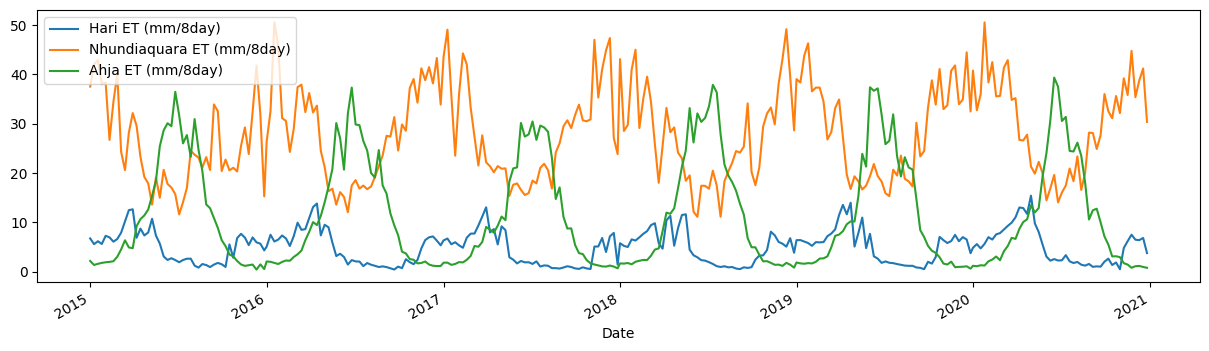

In [15]:
# View evapotranspiration data (8 accumulated days) (2015-2020)
modis_ET['2015':'2020'].plot(figsize=(15,4))

<Axes: xlabel='Date'>

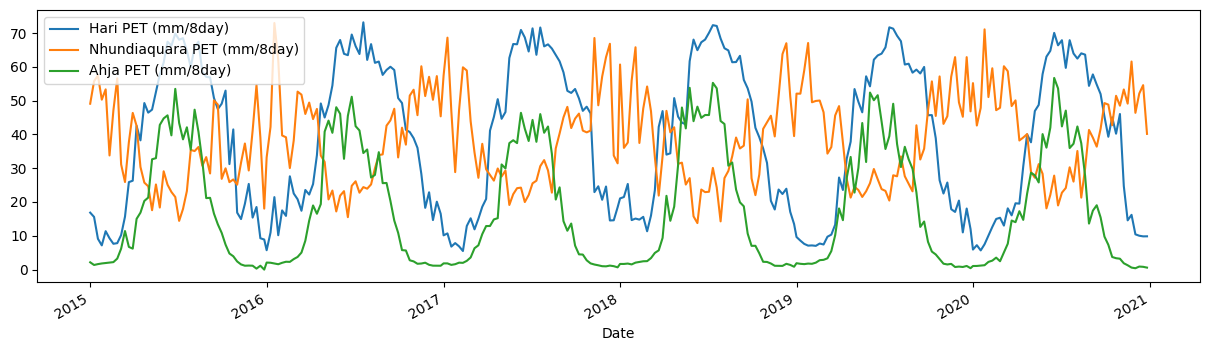

In [16]:
# View potential evapotranspiration data (8 accumulated days) (2015-2020)
modis_PET['2015':'2020'].plot(figsize=(15,4))

## Daily Evapotranspiration

Conversion of 8-day accumulated data to daily data.

Activities:

1. Recognize that there is missing data
2. Search for methods to fill it
* Fill NA/NaN values using the specified method.
 * Syntax:
 ```python
 DataFrame.fillna(method=?)
 ```
 * Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

*  ‘Forward filling’ or ‘padding’ — Use the last known value to fill the new one.
 * Sintax:
 ```python
 DataFrame.ffill() or DataFrame.pad()
 ```
 * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html


* ‘Backfilling’ — Use the next known value to fill the new one.
 * Sintax:
 ```python
 DataFrame.bfill() or DataFrame.backfill()
 ```
 * Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html

3. Fill daily data by: ET or PET / 8

In [17]:
modis_PET

,Hari PET (mm/8day),Nhundiaquara PET (mm/8day),Ahja PET (mm/8day)
Date,,,
2000-01-01,26.503321,33.071931,1.069709
2000-01-09,10.831318,33.600056,1.230220
2000-01-17,8.601710,39.508650,1.557540
2000-01-25,15.225252,36.349386,1.495574
2000-02-02,13.947754,39.068694,1.286388
...,...,...,...
2020-11-24,16.185225,61.567801,0.567207
2020-12-02,10.413327,46.384431,0.377856
2020-12-10,9.999829,52.096987,0.874589


In [18]:
# Create empty DataFrames
modis_PET_day  = pd.DataFrame()
modis_ET_day = pd.DataFrame()

# Create a mask to see if there is duplicated index
mask = modis_PET.index.duplicated()
# Resample to daily data and fill it with .bfill()
modis_PET_day['Hari PET (mm/d)'] = modis_PET.loc[~mask, 'Hari PET (mm/8day)'].resample('1d').bfill()/8
modis_PET_day['Nhundiaquara PET (mm/d)'] = modis_PET.loc[~mask, 'Nhundiaquara PET (mm/8day)'].resample('1d').bfill()/8
modis_PET_day['Ahja PET (mm/d)'] = modis_PET.loc[~mask, 'Ahja PET (mm/8day)'].resample('1d').bfill()/8

mask = modis_ET.index.duplicated()
modis_ET_day['Hari ET (mm/d)'] = modis_ET.loc[~mask, 'Hari ET (mm/8day)'].resample('1d').bfill()/8
modis_ET_day['Nhundiaquara ET (mm/d)'] = modis_ET.loc[~mask, 'Nhundiaquara ET (mm/8day)'].resample('1d').bfill()/8
modis_ET_day['Ahja ET (mm/d)'] = modis_ET.loc[~mask, 'Ahja ET (mm/8day)'].resample('1d').bfill()/8

In [19]:
modis_PET_day

,Hari PET (mm/d),Nhundiaquara PET (mm/d),Ahja PET (mm/d)
Date,,,
2000-01-01,3.312915,4.133991,0.133714
2000-01-02,1.353915,4.200007,0.153777
2000-01-03,1.353915,4.200007,0.153777
2000-01-04,1.353915,4.200007,0.153777
2000-01-05,1.353915,4.200007,0.153777
...,...,...,...
2020-12-22,1.228309,5.018499,0.070218
2020-12-23,1.228309,5.018499,0.070218
2020-12-24,1.228309,5.018499,0.070218


<Axes: xlabel='Date'>

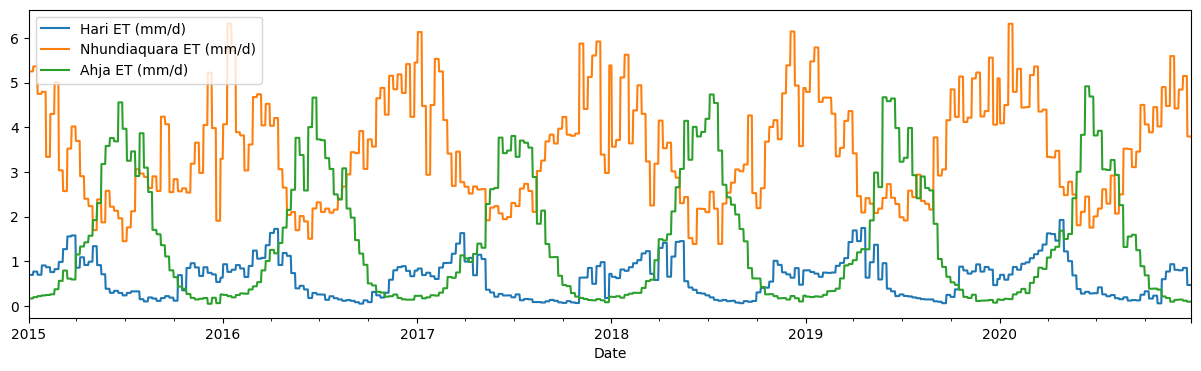

In [20]:
# View evapotranspiration data (daily data) (2015-2020)
modis_ET_day['2015':'2020'].plot(figsize=(15,4))

<Axes: xlabel='Date'>

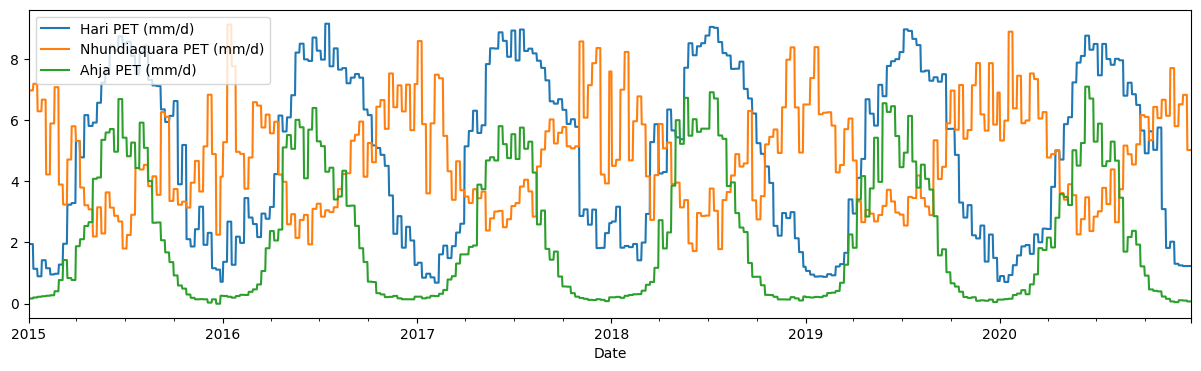

In [21]:
# View pot. evapotranspiration data (daily data) (2015-2020)
modis_PET_day['2015':'2020'].plot(figsize=(15,4))

## Save data to 2 CSV files

If you want to use it in another project, save it to the computer. If you don't save it the Colab will delete it from the cloud once you have disconected from this virtual machine.

In [22]:
modis_PET_day.to_csv('modis_PET_daily.csv')
modis_ET_day.to_csv('modis_ET_daily.csv')

# Let's make total anual evapotranspiration comparison

* How is the Evapotranspiration changing during last 20 years in the 3 locations?

In [23]:
# Let's see only the actual evapotranspiration, sum it anually
modis_ET_year = modis_ET_day.resample('Y').sum()
#modis_PET_year = modis_PET_day.resample('Y').sum()

In [24]:
modis_ET_year.head()

,Hari ET (mm/d),Nhundiaquara ET (mm/d),Ahja ET (mm/d)
Date,,,
2000-12-31,158.816070,1137.521505,436.018376
2001-12-31,149.807276,1245.210038,497.177880
2002-12-31,178.129608,1342.281131,507.356582
2003-12-31,203.641750,1301.304122,484.197420
2004-12-31,176.026495,1244.508712,472.351169


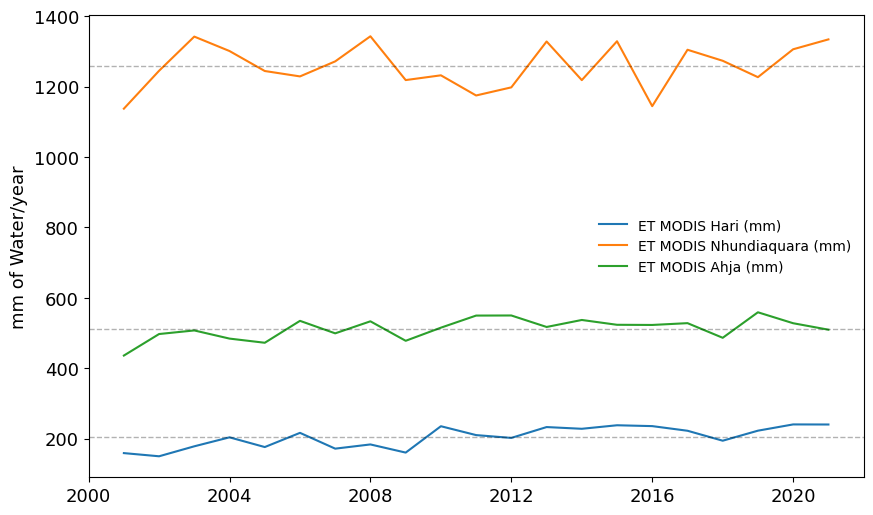

In [25]:
plt.figure(figsize=(10,6))
plt.plot(modis_ET_year['Hari ET (mm/d)'], label='ET MODIS Hari (mm)')
plt.plot(modis_ET_year['Nhundiaquara ET (mm/d)'], label='ET MODIS Nhundiaquara (mm)')
plt.plot(modis_ET_year['Ahja ET (mm/d)'], label='ET MODIS Ahja (mm)')

# specifying horizontal line (at the mean value)
plt.axhline(y = modis_ET_year['Hari ET (mm/d)'].mean(), color = 'black', linestyle = '--',linewidth=1.0,alpha=0.3)
plt.axhline(y = modis_ET_year['Nhundiaquara ET (mm/d)'].mean(), color = 'black', linestyle = '--',linewidth=1.0,alpha=0.3)
plt.axhline(y = modis_ET_year['Ahja ET (mm/d)'].mean(), color = 'black', linestyle = '--',linewidth=1.0,alpha=0.3)

plt.ylabel('mm of Water/year', fontsize=13) #y label
plt.tick_params(axis='both', labelsize=13) #increase font size for ticks
plt.legend(frameon=False,fontsize=10)
#plt.savefig('graficos/PET_e_ET.png', dpi = 300)
plt.show();

## It seams that Hari and Ahja ET are increasing during 20 years

* We could make some linear regression to see how much it increased (task of another lecture)
* Is it due to global warming? I guess so!